In [1]:
import pandas as pd
import numpy as np

# Import

In [3]:
customer_info = pd.read_excel("Downloads/customers (UK).xlsx",sheet_name=0)

customer_info.head(5)

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N


In [5]:
items = pd.read_excel('Downloads/customers (UK).xlsx',sheet_name=1)

items.head(5)

,ItemID,Product,Brand,SellPrice,CostPrice
0,1.0,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943.0,359.0
1,2.0,070ttream0.518887735674677,GO4582ey<S!+k1VE,717.0,207.0
2,3.0,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739.0,199.0
3,4.0,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532.0,262.0
4,5.0,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593.0,392.0


In [12]:
cus_transactions = pd.read_excel('Downloads/customers (UK).xlsx',sheet_name=2)

cus_transactions.head(5)

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0.0,0.0,352.0,2020-03-21,In Store
1,0.0,0.0,3433.0,2020-07-14,In Store
2,0.0,0.0,11162.0,2020-08-09,In Store
3,0.0,0.0,13011.0,2020-12-07,In Store
4,0.0,0.0,13885.0,2020-11-08,In Store


In [27]:
traffic_01 = pd.read_excel('Downloads/Traffic/2020_01.xlsx',sheet_name=0)
traffic_02 = pd.read_excel('Downloads/Traffic/2020_02.xlsx',sheet_name=0)
traffic_03 = pd.read_excel('Downloads/Traffic/2020_03.xlsx',sheet_name=0)
traffic_04 = pd.read_excel('Downloads/Traffic/2020_04.xlsx',sheet_name=0)
traffic_05 = pd.read_excel('Downloads/Traffic/2020_05.xlsx',sheet_name=0)
traffic_06 = pd.read_excel('Downloads/Traffic/2020_06.xlsx',sheet_name=0)
traffic_07 = pd.read_excel('Downloads/Traffic/2020_07.xlsx',sheet_name=0)
traffic_08 = pd.read_excel('Downloads/Traffic/2020_08.xlsx',sheet_name=0)
traffic_09 = pd.read_excel('Downloads/Traffic/2020_09.xlsx',sheet_name=0)
traffic_10 = pd.read_excel('Downloads/Traffic/2020_10.xlsx',sheet_name=0)
traffic_11 = pd.read_excel('Downloads/Traffic/2020_11.xlsx',sheet_name=0)
traffic_12 = pd.read_excel('Downloads/Traffic/2020_12.xlsx',sheet_name=0)

# Merge & Cleaning

In [104]:
sell_total = pd.merge(cus_transactions, items[['ItemID','Brand','SellPrice','CostPrice','Product']], on='ItemID',how='left')
sell_total['month'] = pd.DatetimeIndex(sell_total['TransactionDate']).month
sell_total['year'] = pd.DatetimeIndex(sell_total['TransactionDate']).year

In [16]:
sell_total.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel,Brand,SellPrice,CostPrice,month,year
0,0.0,0.0,352.0,2020-03-21,In Store,"MouDd/fn,XEARhBp",735.0,426.0,3,2020
1,0.0,0.0,3433.0,2020-07-14,In Store,"muy(D#""d02`vwt_^",963.0,491.0,7,2020
2,0.0,0.0,11162.0,2020-08-09,In Store,Wem+H2Pk8Jfbb*[D,582.0,391.0,8,2020
3,0.0,0.0,13011.0,2020-12-07,In Store,ThcmX`v~{K~t{Jeh,339.0,135.0,12,2020
4,0.0,0.0,13885.0,2020-11-08,In Store,Ka53T<K8f.2M94Yd,1369.0,231.0,11,2020


In [105]:
data = pd.merge(sell_total, customer_info, left_on='CustomerID', right_on='ID')

In [106]:
data.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel,Brand,SellPrice,CostPrice,Product,month,year,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0.0,0.0,352.0,2020-03-21,In Store,"MouDd/fn,XEARhBp",735.0,426.0,chrUrumor0.784919078952733,3,2020,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,0.0,0.0,3433.0,2020-07-14,In Store,"muy(D#""d02`vwt_^",963.0,491.0,corGvideo0.268391324982493,7,2020,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
2,0.0,0.0,11162.0,2020-08-09,In Store,Wem+H2Pk8Jfbb*[D,582.0,391.0,sevCrtage0.255053382396546,8,2020,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
3,0.0,0.0,13011.0,2020-12-07,In Store,ThcmX`v~{K~t{Jeh,339.0,135.0,theB-info0.46598133500784,12,2020,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
4,0.0,0.0,13885.0,2020-11-08,In Store,Ka53T<K8f.2M94Yd,1369.0,231.0,kanyained0.673922507607742,11,2020,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25213 entries, 0 to 25212
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          25213 non-null  float64       
 1   CustomerID       25213 non-null  float64       
 2   ItemID           25213 non-null  float64       
 3   TransactionDate  25213 non-null  datetime64[ns]
 4   Channel          25213 non-null  object        
 5   Brand            25213 non-null  object        
 6   SellPrice        25213 non-null  float64       
 7   CostPrice        25213 non-null  float64       
 8   month            25213 non-null  int64         
 9   year             25213 non-null  int64         
 10  FirstName        25213 non-null  object        
 11  LastName         25213 non-null  object        
 12  Country          25213 non-null  object        
 13  DateJoined       25213 non-null  datetime64[ns]
 14  Gender           16892 non-null  objec

In [28]:
data.drop('ID', inplace=True, axis=1)

In [10]:
traffic = pd.concat([traffic_01, traffic_02,traffic_03,traffic_04,traffic_05,\
                     traffic_06,traffic_07,traffic_08,traffic_09,traffic_10,traffic_11,traffic_12],\
                    ignore_index=True)

In [11]:
traffic.head()

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08


In [18]:
traffic['Page URL'].iloc[0].split('/')[-1]

'032irview0.686128260621012'

In [19]:
traffic['Product'] = range(len(traffic['Page URL']))
for i in range(len(traffic['Page URL'])):
    traffic['Product'][i] = traffic['Page URL'].iloc[i].split('/')[-1]

/var/folders/h_/zh8kq2q970j7jgbpckxd9gj80000gn/T/ipykernel_11578/3251303432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic['Product'][i] = traffic['Page URL'].iloc[i].split('/')[-1]
/Users/trananhquan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
traffic.sort_values('Posted On (DD/MM/YYYY)', ascending=True, inplace=True, ignore_index=True)

In [36]:
data.sort_values('TransactionDate', ascending=True, inplace=True, ignore_index=True)

In [22]:
traffic.head()

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Product
0,/2020/1/vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01 01:03:02,vanBip-on0.100834672919284
1,/2020/1/fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01 01:46:40,fujBdence0.385183712192661
2,/2020/1/baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01 02:55:07,baiXpsule0.236876019278184
3,/2020/1/artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01 04:18:00,artjriner0.183950395687591
4,/2020/1/appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01 04:35:14,appMn-usd0.284138838758011


In [37]:
data.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel,Brand,SellPrice,CostPrice,month,year,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,1639.0,144.0,2736.0,2020-01-01,Online,So)zm5Pl^_G5_x007f_t?q,747.0,363.0,1,2020,Ric0.12434077974775,Tamo0.747855032136146,IT - Italy,2015-03-09,M,1993-02-26,N
1,6695.0,612.0,14942.0,2020-01-01,In Store,Ap!FulqmT[82a2/E,929.0,348.0,1,2020,Ridh0.6269774796358,Zuk0.439693338061207,FR - France,2016-09-13,NaN,2007-12-02,N
2,1170.0,108.0,12987.0,2020-01-01,In Store,Te0.)edhJTDlX%vE,1394.0,472.0,1,2020,Ch0.237920427031177,Loh0.791222685855633,FR - France,2016-03-22,M,1967-07-25,N
3,1830.0,166.0,3252.0,2020-01-01,In Store,Ap!FulqmT[82a2/E,561.0,280.0,1,2020,Fern0.180060029060372,Medin0.634042769916507,IT - Italy,2016-05-03,F,1976-12-11,Y
4,5800.0,533.0,12603.0,2020-01-01,Online,NiPea$n|Eu@<@>'L,932.0,176.0,1,2020,Se0.730563054519865,Girsa0.795430113156434,UK - United Kingdom,2015-05-25,M,2004-08-27,N


# 1. What is the impact of our website traffic on revenue?

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
summary_trans = data.groupby(["TransactionDate","Channel"]).\
                            agg(total_orders = ('OrderID','nunique'),total_items = ('ItemID','size'), total_revenue = ('SellPrice','sum')).\
                            reset_index()

In [67]:
summary_trans

,TransactionDate,Channel,total_orders,total_items,total_revenue
0,2020-01-01,In Store,30,30,23820.0
1,2020-01-01,Online,35,36,32044.0
2,2020-01-02,In Store,33,33,24069.0
3,2020-01-02,Online,40,40,31612.0
4,2020-01-03,In Store,46,46,37118.0
...,...,...,...,...,...
643,2020-12-25,Online,43,43,31365.0
644,2020-12-26,In Store,28,28,23072.0
645,2020-12-26,Online,39,41,33473.0
646,2020-12-27,In Store,45,45,37629.0


In [55]:
summary_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionDate  648 non-null    datetime64[ns]
 1   Channel          648 non-null    object        
 2   total_orders     648 non-null    int64         
 3   total_items      648 non-null    int64         
 4   total_revenue    648 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 25.4+ KB


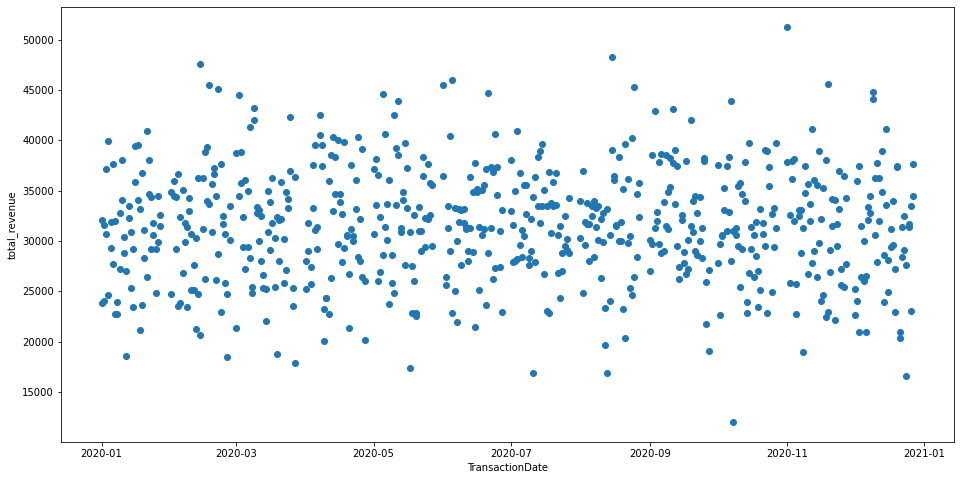

In [62]:
fig2, ax2 = plt.subplots(figsize=(16,8))
ax2.scatter(summary_trans['TransactionDate'], summary_trans['total_revenue'])
ax2.set_xlabel('TransactionDate')
ax2.set_ylabel('total_revenue')
plt.show()

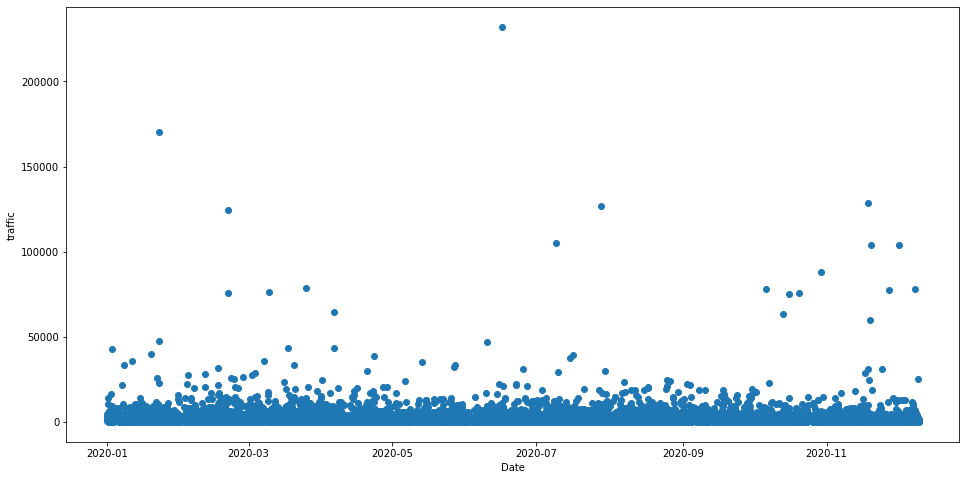

In [75]:
fig2, ax2 = plt.subplots(figsize=(16,8))
ax2.scatter(traffic['Posted On (DD/MM/YYYY)'],traffic['pageviews'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Views')
plt.show()

In [83]:
traffic_ro = traffic.loc[traffic['pageviews'] < 30000]

Checking after remove Outliers

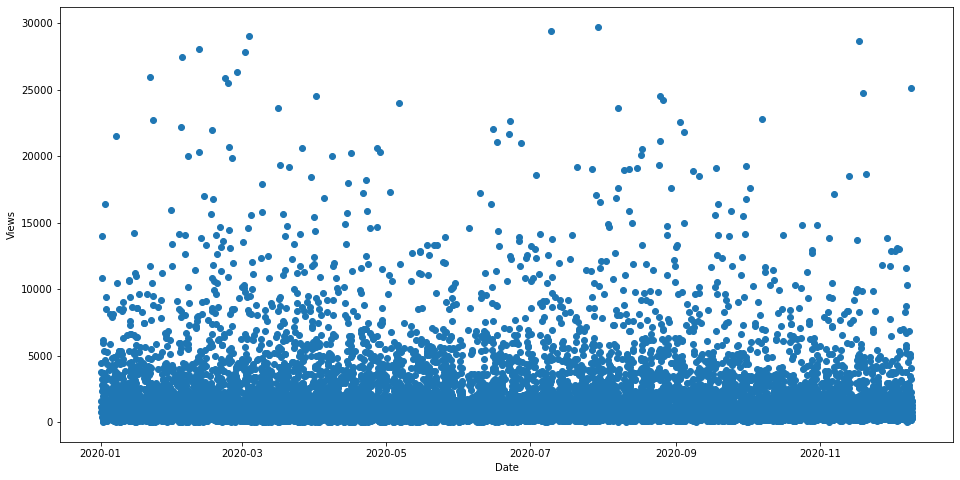

In [87]:
fig2, ax2 = plt.subplots(figsize=(16,8))
ax2.scatter(traffic_ro['Posted On (DD/MM/YYYY)'],traffic_ro['pageviews'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Views')
plt.show()

In [70]:
#summary_trans_ro = summary_trans[summary_trans['total_revenue'] > 24999,\
#                                 summary_trans['total_revenue'] < 40001]

summary_trans_ro = summary_trans.loc[summary_trans['total_revenue'] > 24999]
summary_trans_ro2 = summary_trans_ro.loc[summary_trans_ro['total_revenue'] < 40001]

Checking after remove Outliers

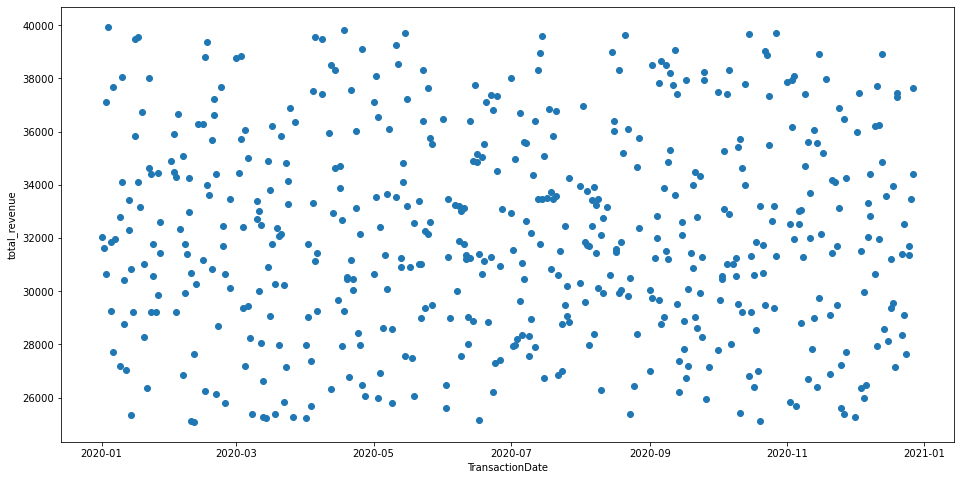

In [73]:
fig2, ax2 = plt.subplots(figsize=(16,8))
ax2.scatter(summary_trans_ro2['TransactionDate'], summary_trans_ro2['total_revenue'])
ax2.set_xlabel('TransactionDate')
ax2.set_ylabel('total_revenue')
plt.show()

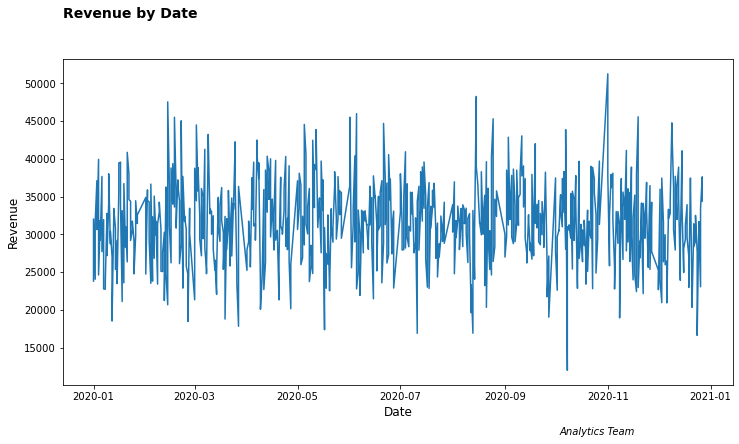

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary_trans_ro['TransactionDate'], summary_trans_ro['total_revenue'],)


# thêm title, label các trục và source:
plt.suptitle('Revenue by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('Revenue', size=12)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

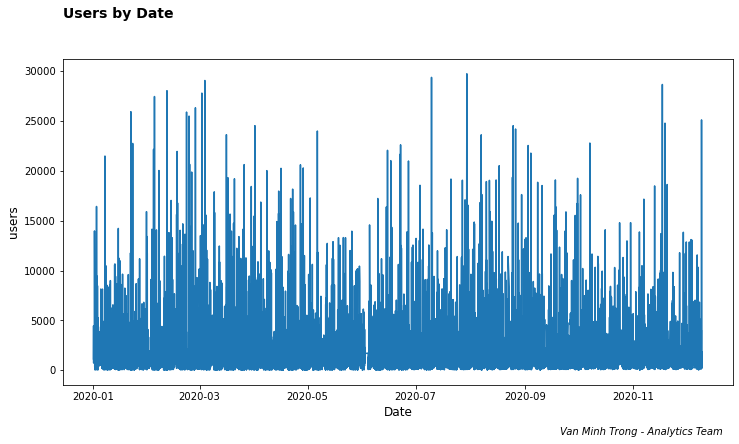

In [90]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffic_ro['Posted On (DD/MM/YYYY)'],traffic_ro['pageviews'])


# thêm title, label các trục và source:
plt.suptitle('Users by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('users', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

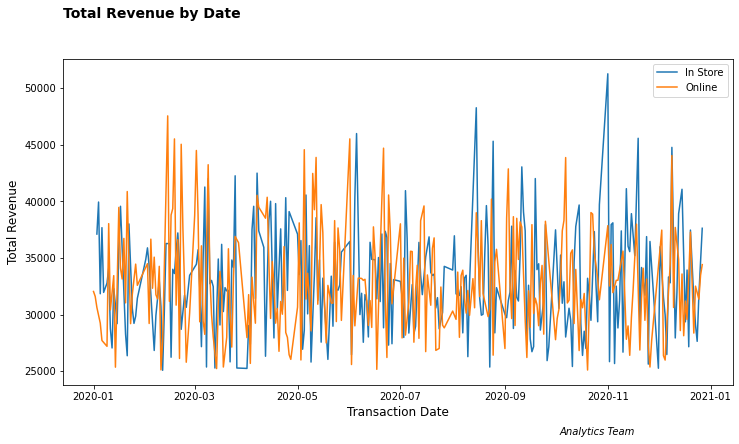

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary_trans_ro[summary_trans_ro["Channel"] == "In Store"].TransactionDate,\
        summary_trans_ro[summary_trans_ro["Channel"] == "In Store"].total_revenue, \
       label="In Store")

ax.plot(summary_trans_ro[summary_trans_ro["Channel"] == "Online"].TransactionDate,\
        summary_trans_ro[summary_trans_ro["Channel"] == "Online"].total_revenue, \
       label="Online")

plt.legend()
# thêm title, label các trục và source:
plt.suptitle('Total Revenue by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total Revenue', size=12)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

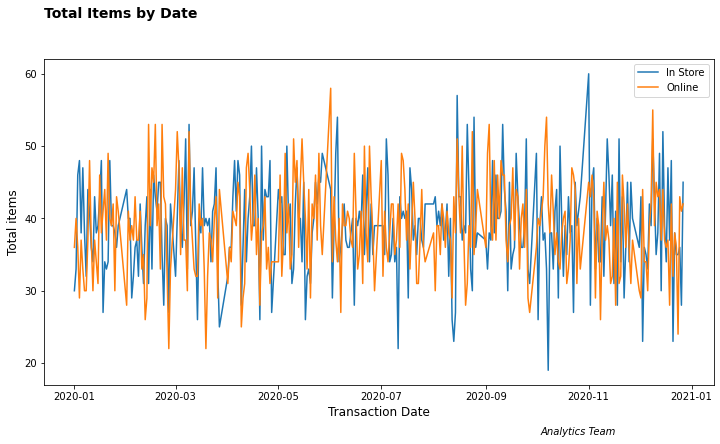

In [94]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summary_trans[summary_trans["Channel"] == "In Store"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "In Store"].total_items, \
       label="In Store")

ax.plot(summary_trans[summary_trans["Channel"] == "Online"].TransactionDate,\
        summary_trans[summary_trans["Channel"] == "Online"].total_items, \
       label="Online")

plt.legend()
# thêm title, label các trục và source:
plt.suptitle('Total Items by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total items', size=12)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

Khoảng đầu giữa năm (tháng 1 tới tháng 5) lượt Pageviews duy trì ở mức cao, đồng thời cho thấy doanh thu trong khoảng này của 'Online' có thể thấy cao hơn 'In Store'

Tuy nhiên càng về gần cuối năm mức doanh thu 'In Store' đã vượt trội hơn, cho thấy xu hướng tiêu dùng của khách hàng

Mặc dù lượng Pageviews các tháng vẫn ổn định, nhưng biểu đồ trên đã cho thấy hình thức mua sắm online khoảng đầu năm sẽ vượt trội hơn khoảng cuối năm. Điều này có thể giúp bộ phận Marketing có những phương án phù hợp để truyên thông sản phẩm tới người tiêu dùng

# 2. Which products get us pageviews and revenue?

# Top 10 Product with more Pageviews

In [96]:
pageviews = traffic.groupby(["Brand","Product"]).agg(total_pageviews = ('pageviews','sum')).reset_index()

In [97]:
pageviews.sort_values('total_pageviews', ascending=False, inplace=True, ignore_index=True)

In [98]:
pageviews.head(10)

,Brand,Product,total_pageviews
0,So)zm5Pl^_G5t?q,sonEies-x0.139039192479287,232177.0
1,"Ac8IJsKH,4xtY.Tk",porQlease0.507911745358356,170599.0
2,PU]vXmX9fgf$xf!/,pumMvideo0.837931992780922,128891.8
3,BajeQM&IzKX.a8&_,besfeek-50.280274313298435,126771.0
4,LaX{ty9j_zZdD-\`,rogLrecap0.644396392507623,124284.2
5,Stc\9>Cqq;Rn&/|F,jefXaunch0.410067394635876,104984.2
6,"Ch6hNzXa,'=Q=)Wi",chrL-york0.372865344640649,103863.4
7,Wrv1Qv~}Dk7@']x3,wradaunch0.370927222684073,103850.0
8,An1a]{mE?nl\sM%&,angztered0.926486710136623,87999.6
9,Ai/cV(XG>`JN2Ln,goa]akers0.899516668943853,78523.6


In [99]:
top10_views = pageviews.head(10).copy()

In [100]:
top10_views.sort_values('total_pageviews', ascending=True, inplace=True, ignore_index=True)

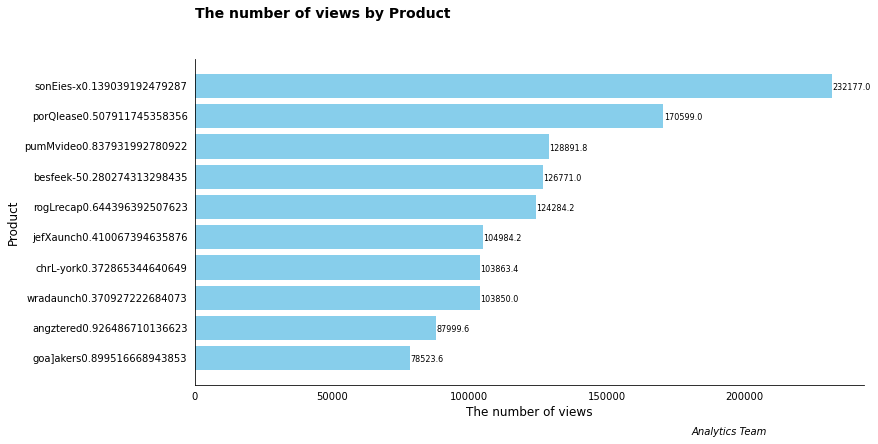

In [101]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_views['Product'],top10_views['total_pageviews'],data=top10_views,color='#87ceeb')

# Show dữ liệu
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_views.total_pageviews[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('The number of views by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('The number of views', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [108]:
revenue = data.groupby(["Brand","Product"]).agg(total_revenue = ('SellPrice','sum')).reset_index()

In [109]:
revenue.sort_values('total_revenue', ascending=False, inplace=True, ignore_index=True)

In [110]:
revenue.head(10)

,Brand,Product,total_revenue
0,Il^(xPdB:S`#irqz,hypsrview0.321288570724117,11556.0
1,"Relp\+KJ?D,cWw0P",reeelease0.452821711209563,9205.0
2,"Ac8IJsKH,4xtY.Tk",audE-info0.884915261087885,8428.0
3,DiCo4(99zZ<nkafj,kinv-news0.29905739542661,7980.0
4,YMbpE$ev3qMx-h*E,ymc_orson0.319251813809483,7794.0
5,"BMh._Fx~""+dbZy|,",bmwk-20210.31690704020655,7686.0
6,Ap8r`F[}sfP_x007f_->SZ,ubeYanada0.100113795307302,7552.0
7,go@c<p.bPWb1nLrF,titM-info0.550757203954225,7520.0
8,Sa?9zXUH5iJbuE'S,samLement0.78565851365938,7518.0
9,DiL%1<G?YSFM_/TR,dioa-info0.750756927974235,7422.0


In [111]:
top10_revenue = revenue.head(10).copy()

In [112]:
top10_revenue.sort_values('total_revenue', ascending=True, inplace=True, ignore_index=True)

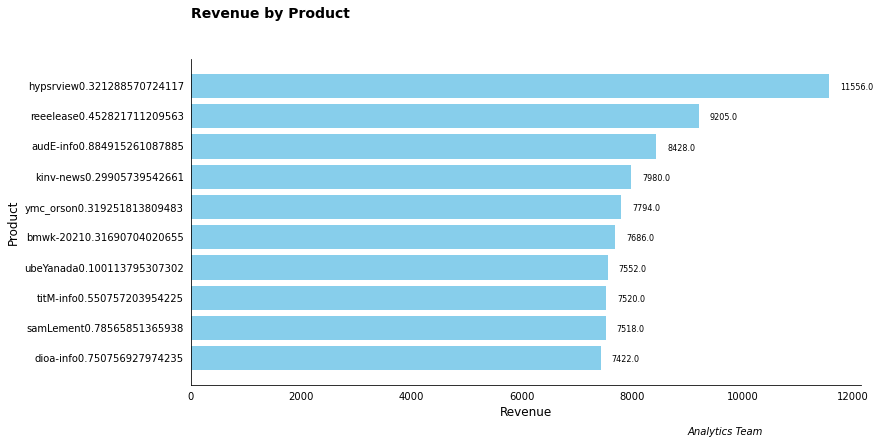

In [114]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_revenue['Product'],top10_revenue['total_revenue'],data=top10_revenue,color='#87ceeb')

# Show dữ liệu
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_revenue.total_revenue[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('Revenue by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Revenue', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

# 3. What customer segments are there?

# Features Engineering

In [116]:
customer_data = data.groupby(["CustomerID","FirstName", "LastName","Country","Birthday","DateJoined","Newsletter"]).\
                            agg(total_expenditures = ('SellPrice','sum')).\
                            reset_index()

In [117]:
customer_data.head()

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997.0
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948.0
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879.0
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603.0
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029.0


In [118]:
from datetime import date

today = date.today()

# tính tuổi
customer_data['Age'] = range(len(customer_data['Birthday']))
for i in range(len(customer_data['Birthday'])):
    customer_data['Age'][i] = today.year - customer_data['Birthday'][i].year

# tính số năm trở thành thành viên
customer_data['Loyalty'] = range(len(customer_data['DateJoined']))
for i in range(len(customer_data['DateJoined'])):
    customer_data['Loyalty'][i] = today.year - customer_data['DateJoined'][i].year

/var/folders/h_/zh8kq2q970j7jgbpckxd9gj80000gn/T/ipykernel_11578/2439915909.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Age'][i] = today.year - customer_data['Birthday'][i].year
/var/folders/h_/zh8kq2q970j7jgbpckxd9gj80000gn/T/ipykernel_11578/2439915909.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Loyalty'][i] = today.year - customer_data['DateJoined'][i].year


In [119]:
customer = customer_data.merge(customer_info[['ID','Gender']],how='inner',left_on='CustomerID', right_on='ID')

In [120]:
customer.drop('ID', inplace=True, axis=1)

In [121]:
from termcolor import colored
list_=['Country','Newsletter','Loyalty','Gender']
for i in list_:
    print(colored("Column " + i, 'blue', attrs=['bold']))
    print(customer[i].unique())
    print("\n")

Column Country
['FR - France' 'GER - Germany' 'UK - United Kingdom' 'IT - Italy']


Column Newsletter
['N' 'Y']


Column Loyalty
[7 6]


Column Gender
[nan 'M' 'F']




Các trường Country, Newsletter, Loyalty, Gender chứa hữu hạn các giá trị phân biệt, không thích hợp để phân loại khách hàng

Các trường CustomerID, FirstName, LastName, Birthday, DateJoined không chứa nhiều ý nghĩa để phân loại khách hàng

Chọn 2 chỉ tiêu là total_expenditures và Age để phân loại phân khúc khách hàng

Chọn total_expenditures và Age làm giá trị để phân loại tập khách hàng

In [122]:
data_set = customer.iloc[:,[7,8]]

In [123]:
data_set

,total_expenditures,Age
0,32997.0,54
1,34948.0,13
2,17879.0,32
3,14603.0,48
4,37029.0,41
...,...,...
765,29538.0,33
766,5331.0,57
767,45470.0,42
768,35462.0,42


# Build Model

In [125]:
#from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [126]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_set)

## Elbow curve to find optimal K

In [127]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

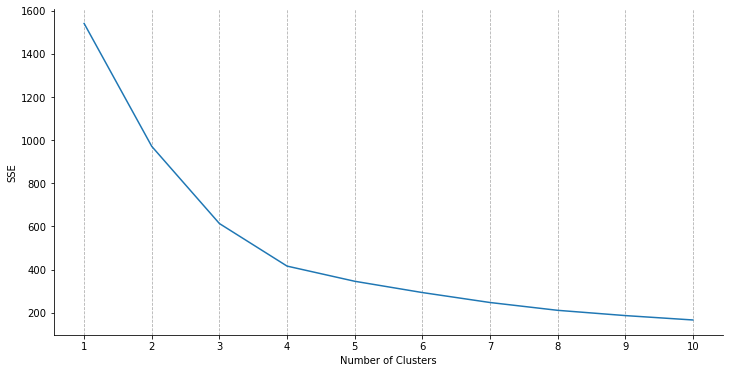

In [128]:
#plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(1, 11), sse)

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
    
ax.xaxis.grid(linestyle='dashed')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Silhouette Coefficient

In [129]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

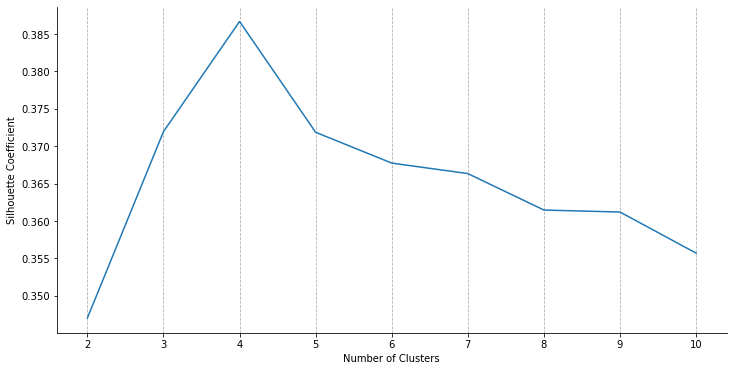

In [130]:
#plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(2, 11), silhouette_coefficients)

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
    
ax.xaxis.grid(linestyle='dashed')
plt.xticks(range(2, 11))

plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [131]:
kmeans = KMeans(n_clusters=4,**kmeans_kwargs)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, random_state=42)

In [132]:
data_set['Cluster_Labels'] = kmeans.labels_

/var/folders/h_/zh8kq2q970j7jgbpckxd9gj80000gn/T/ipykernel_11578/3536417683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Cluster_Labels'] = kmeans.labels_


In [133]:
data_set['Cluster_Labels'].value_counts()

1    206
2    194
0    189
3    181
Name: Cluster_Labels, dtype: int64

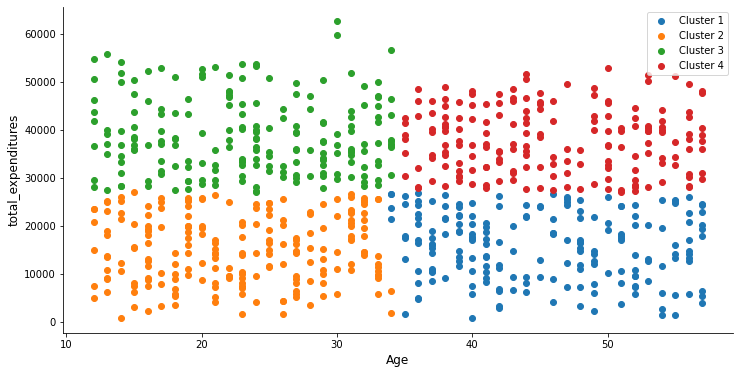

In [134]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(data_set[data_set['Cluster_Labels']==0].Age, data_set[data_set['Cluster_Labels']==0].total_expenditures, label = 'Cluster 1')
ax.scatter(data_set[data_set['Cluster_Labels']==1].Age, data_set[data_set['Cluster_Labels']==1].total_expenditures, label = 'Cluster 2')
ax.scatter(data_set[data_set['Cluster_Labels']==2].Age, data_set[data_set['Cluster_Labels']==2].total_expenditures, label = 'Cluster 3')
ax.scatter(data_set[data_set['Cluster_Labels']==3].Age, data_set[data_set['Cluster_Labels']==3].total_expenditures, label = 'Cluster 4')

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
plt.xlabel('Age', size=12)
plt.ylabel('total_expenditures', size=12)
plt.legend()
plt.show()

# Kết luận: tập khách hàng có thể chia thành 4 nhóm

Nhóm khách hàng dưới 35 tuổi, có mức chi tiêu dưới 25000
Nhóm khách hàng dưới 35 tuổi, có mức chi tiêu trên 25000
Nhóm khách hàng trên 35 tuổi, có mức chi tiêu dưới 25000
Nhóm khách hàng trên 35 tuổi, có mức chi tiêu trên 25000